<a href="https://qworld.net" target="_blank" align="left"><img src="./images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> First Quantum Programs with ProjectQ </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br>

<br><br>

In principle, every reversible classical program (i.e., a classical program containing only reversible operators) is also a quantum program. 
 
NOT operator is a classical reversible operator, and so we can design quantum programs by using NOT operator.
<hr>

For our quantum programs, we will design quantum circuits by using quantum programming framework <a href="https://projectq.ch/" target="_blank">ProjectQ</a>.
Click on the link highlighted to learn more about the framework.

As a warm-up example, here we design a circuit with a single quantum bit (qubit).

We highlight the details on designing quantum circuits as comments along with our codes.

<h3> Design a circuit</h3>

We design a quantum circuit with a single quantum bit and a single classical bit.

We apply the NOT operator on the quantum bit, and then we measure the quantum bit, the outcome of which will be saved on the classical bit.

In [1]:
# We begin our circuit creation by first importing the objects required for our quantum circuit
"""
The first object we import is the MainEngine. The MainEngine object is responsible for  creation of qubits and provides
all basic functionality to our quantum program. Here we use it to initialize our qubit and keep track of measurement results 
"""

from projectq import MainEngine # import the main compiler engine

# Now next, we import all the operations that we want to perform on our qubit 
from projectq.ops import X,Measure  # import the operations we want to perform (Measurement operator)

# Let us now create a default compiler object to call it for every operation. Let us name it "eng" for engine.
eng = MainEngine() # create a default compiler (the back-end is a simulator)

# Now let us allocate our qubit. Here we are allocating one qubit named "qubit". Here we have no concept of a classical qubit as Qiskit so we do not need to allocate the same.
qubit = eng.allocate_qubit()  # allocate 1 qubit. Notice we are allocating using the engine object we created before.

# Our Quantum circuit is now defined. Let us apply operations on our circuit now.

"""
Operators are called as gates. Let us apply the NOT operator represented as "X" in ProjectQ. We need to specify which
qubit we are applying our operator to after the "|" symbol. We use our previous qubit named "qubit" in this example
"""
# Let us apply the X gate to our "qubit" object. 
X | qubit # apply X gate

# Let us now Measure the circuit. for the same, we use the "Measure" operation applied to our qubit to be measured
Measure | qubit # apply Measurement operation


(Note: This is the (slow) Python simulator.)


<h3>Execute the circuit</h3>

A quantum program can be executed on a real quantum computer or a local classical simulator or a simulator in the cloud. Here we use a local classical simulator provided by ProjectQ and so our results will be (almost) accurate. Note that we can also use IBM backends using ProjectQ provided you have your IBMQ experience API token key

*Remark that the existing real quantum computers are still noisy and so the observed results will be inaccurate.*

To measure, we first flush the circuit to the backend using the flush() function following which we can print our result as int as shown below:


In [2]:
# We flush the circuit to print the value. We first need to call the flush() function on our "eng" object followed by our print statement
eng.flush() # flush all gates (and execute measurements). Default backend is the ProjectQ Simulator.

# Now we print our flushed measurement value and convert it to an integer using the int() command
print("Measured: {}".format(int(qubit)))  # output measurement result

# We run our codes until now, and lets look at drawing our circuit next
print("The design of the circuit is done.")


Measured: 1
The design of the circuit is done.


That is, the outcome 1 and the circuit has executed as expected

<i>The output is composed directly of the measurement outcome unlike some other implementations </i>

After executing the above program on a real quantum computer by using <a href="https://quantum-computing.ibm.com" target="_blank">IBM Quantum Experience</a>, we obtained the value of '0' 62 times and the value of '1' 962 times.

<h3> Visualize the circuit </h3>

Visualizing quantum circuits are always helpful to see the whole program at once. 

Circuit drawing in ProjectQ requires a few prequisite steps. Let us look at it in this circuit. This circuit is based similar to the circuit we just created above.

(Note: This is the (slow) Python simulator.)
(<Figure size 207.288x144 with 1 Axes>, <AxesSubplot:>)


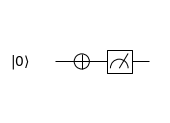

In [3]:
# To draw in ProjectQ we need to call in a special CircuitDrawerMatplotlib backend. Let is import the same.
from projectq.backends import CircuitDrawerMatplotlib
# The default drawing method uses LaTex as a code generator

# Let us now create an engine object for drawing. We shall name it "drawing_engine"
drawing_engine = CircuitDrawerMatplotlib()

# Let us now create an engine object for our circuit like the previous example. We shall pass our drawing engine in the MainEngine routine for drawing the circuit. Notice the extra parameter of "engine_list" passed.
eng = MainEngine(engine_list=[drawing_engine])

# Creating our qubit and naming it "qubit"
qubit = eng.allocate_qubit() # allocate 1 qubit

# Applying NOT gate to our "qubit" and Measuring the same
X | qubit # apply X gate
Measure | qubit # apply Measurement operation

# Now we flush the circuit to print the value.
eng.flush()

# We now print the circuit. The CircuitDrawerMatplotlib engine returns us a circuit figure as shown below
print(drawing_engine.draw())

<h3> The Circuit </h3>
As seen explicitly in the first diagram, each quantum or classical bit is set to value/state 0 at the beginning. 

<i>As a convention in quantum computing (mechanics), state 0 is denoted as $ \ket{0} $. This notation is called as <b>ket</b>.</i>

Each quantum bit is represented as a single straight line which you may think of as wires.

The X-gate is shown as the circular operator and measurement operators are shown as boxes. *Remark that the measurement operator is represented differently in the diagrams. Both are used in the literature.* 

The number of qubits and the variable name associated with it represents the index of storing the measuremnt outcome.

The state of the quantum bit is expected to be $ \ket{1} $ after the operator. So, the value of the classical bit after the measurement is expected to be 1.

<h3> A quantum circuit with more quantum bits</h3>

We design a new quantum circuit with four quantum bits.  

In [4]:
# A quantum circuit with four quantum bits

# Import all objects and methods at once
from projectq.backends import Simulator
from projectq import MainEngine 
from projectq.backends import CircuitDrawerMatplotlib
from projectq.ops import X,Measure,Barrier,All
from projectq.setups.default import get_engine_list

""" A small note regarding MainEngine initialization. In the previous examples we were either only measuring or printing the circuit. Here, we need
to do both which is why we are explicitly specifying the backend as the default Simulator() and engine_list as our CircuitDrawerMatplotlib(). This will enable
us to call both the Simulator for measurement as well as the CircuitDrawerMatplotlib for generating our circuit preview"""

# Initialize Simulator() and CircuitDrawerMatplotlib()
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list=[drawing_engine]+get_engine_list())

# Allocate qubits. Here we use allocate_qureg to allocate multiple qubits as a list
qubit = eng.allocate_qureg(4)

# Apply x-gate to the first quantum bit twice. Notice we can address qubits as a list
X | qubit[0]
X | qubit[0]

# Apply x-gate to the fourth quantum bit once
X | qubit[3]

# Apply x-gate to the third quantum bit three times
X | qubit[2]
X | qubit[2]
X | qubit[2]

# Apply x-gate to the second quantum bit four times
# Let us apply the gates using a for loop this time for a change.
for i in range (4):
    X | qubit[1]

# Define a barrier (for a better visualization)
Barrier | qubit

# Flush circuit to backend
eng.flush()

# Let us measure our values. The All function allows us to measure all values together and pass qubits as a list
All(Measure) | qubit

# Print the measured output
print("Measured: {}{}{}{}".format(int(qubit[0]),int(qubit[1]),int(qubit[2]),int(qubit[3])))

# Confirm circuit run
print("The design of the circuit is done.")

(Note: This is the (slow) Python simulator.)
Measured: 0011
The design of the circuit is done.


(<Figure size 466.627x360 with 1 Axes>, <AxesSubplot:>)


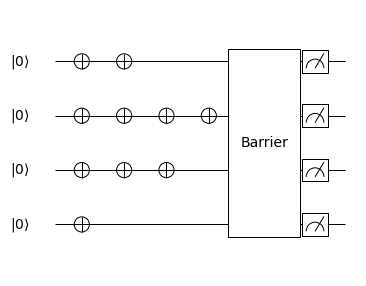

In [5]:
# Print the circuit designed using draw function for visualization
print(drawing_engine.draw())

<h3> Ordering of qubits </h3>

The default order of quantum bits from top to down is $ qubit[0], qubit[1], qubit[2], qubit[3] $.

The order depends on the qubit registers, hence we can reverse it if we reverse the list while printing.

<h3> Task 1 </h3>

Guess the outcome by checking the circuit above.

Then, compare your guess with the result obtained after executing our circuit 10 times.

In [6]:
# Enter your answer here

<h3>Reading order</h3> 

ProjectQ combines the four quantum bits in the following order:

$$ qubit[0], qubit[1], qubit[2], qubit[3] .$$

Then, each outcome is read in the same order.

The outcome is a binary number, and so the first digit is expected to be the most significant bit and the last digit is expected to be the least significant bit.

For example, $ 13 =  \mathbf{1} \cdot 2^3 + \mathbf{1} \cdot 2^2 + \mathbf{0} \cdot 2^1 + \mathbf{1} \cdot 2^0 $, which is equal to $ \mathbf{1101} $ in binary.

In this case, $ qubit[0] = 1 $, $ qubit[1] = 1 $, $ qubit[2] = 0 $, and $ qubit[3] = 1$. 

Note: Since the qubit list we are printing is in our control, we can print in any order which we want. In the examples we have printed in the order specified above.

<h3>Pick a random number in python</h3>

In the following task, you will be asked to apply x-gate to randomly picked quantum bits.

Here is one of the methods to pick a random number in python.

In [7]:
from random import randrange
n = 20
r=randrange(n) # pick a number from the list {0,1,...,n-1}
print(r)

# test this method by using a loop
for i in range(10):
    print(randrange(n))

9
8
3
19
19
4
5
14
2
3
7


<h3> Task 2: Randomly picking an 8-bit binary number </h3>

Design a quantum circuit with 8 quantum bits.

For each quantum bit, flip a coin by python, and apply x-gate if the outcome is head.

Measure your quantum bits.

Execute your circuit 10 times.

Repeat this task as much as you want, and enjoy your random choices.

In [ ]:
######################
# Enter your code here
######################


[click for our solution](Q12_First_Quantum_Programs_with_ProjectQ_Solution.ipynb)